# Mapa

In [2]:
import pandas as pd
cluster = pd.read_csv('clusters.csv', encoding='utf-8')

In [5]:
df_agregado = pd.read_csv('df_agregado.csv',sep=';')

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile
shape_brasilia = gpd.read_file('shape/RA_2019.shp')

In [8]:
shape_brasilia['RA'] = shape_brasilia['ra_num']

In [9]:
merged = shape_brasilia.set_index('RA').join(df_agregado.set_index('RA')).join(cluster.drop('Cidade',axis=1).set_index('RA'))

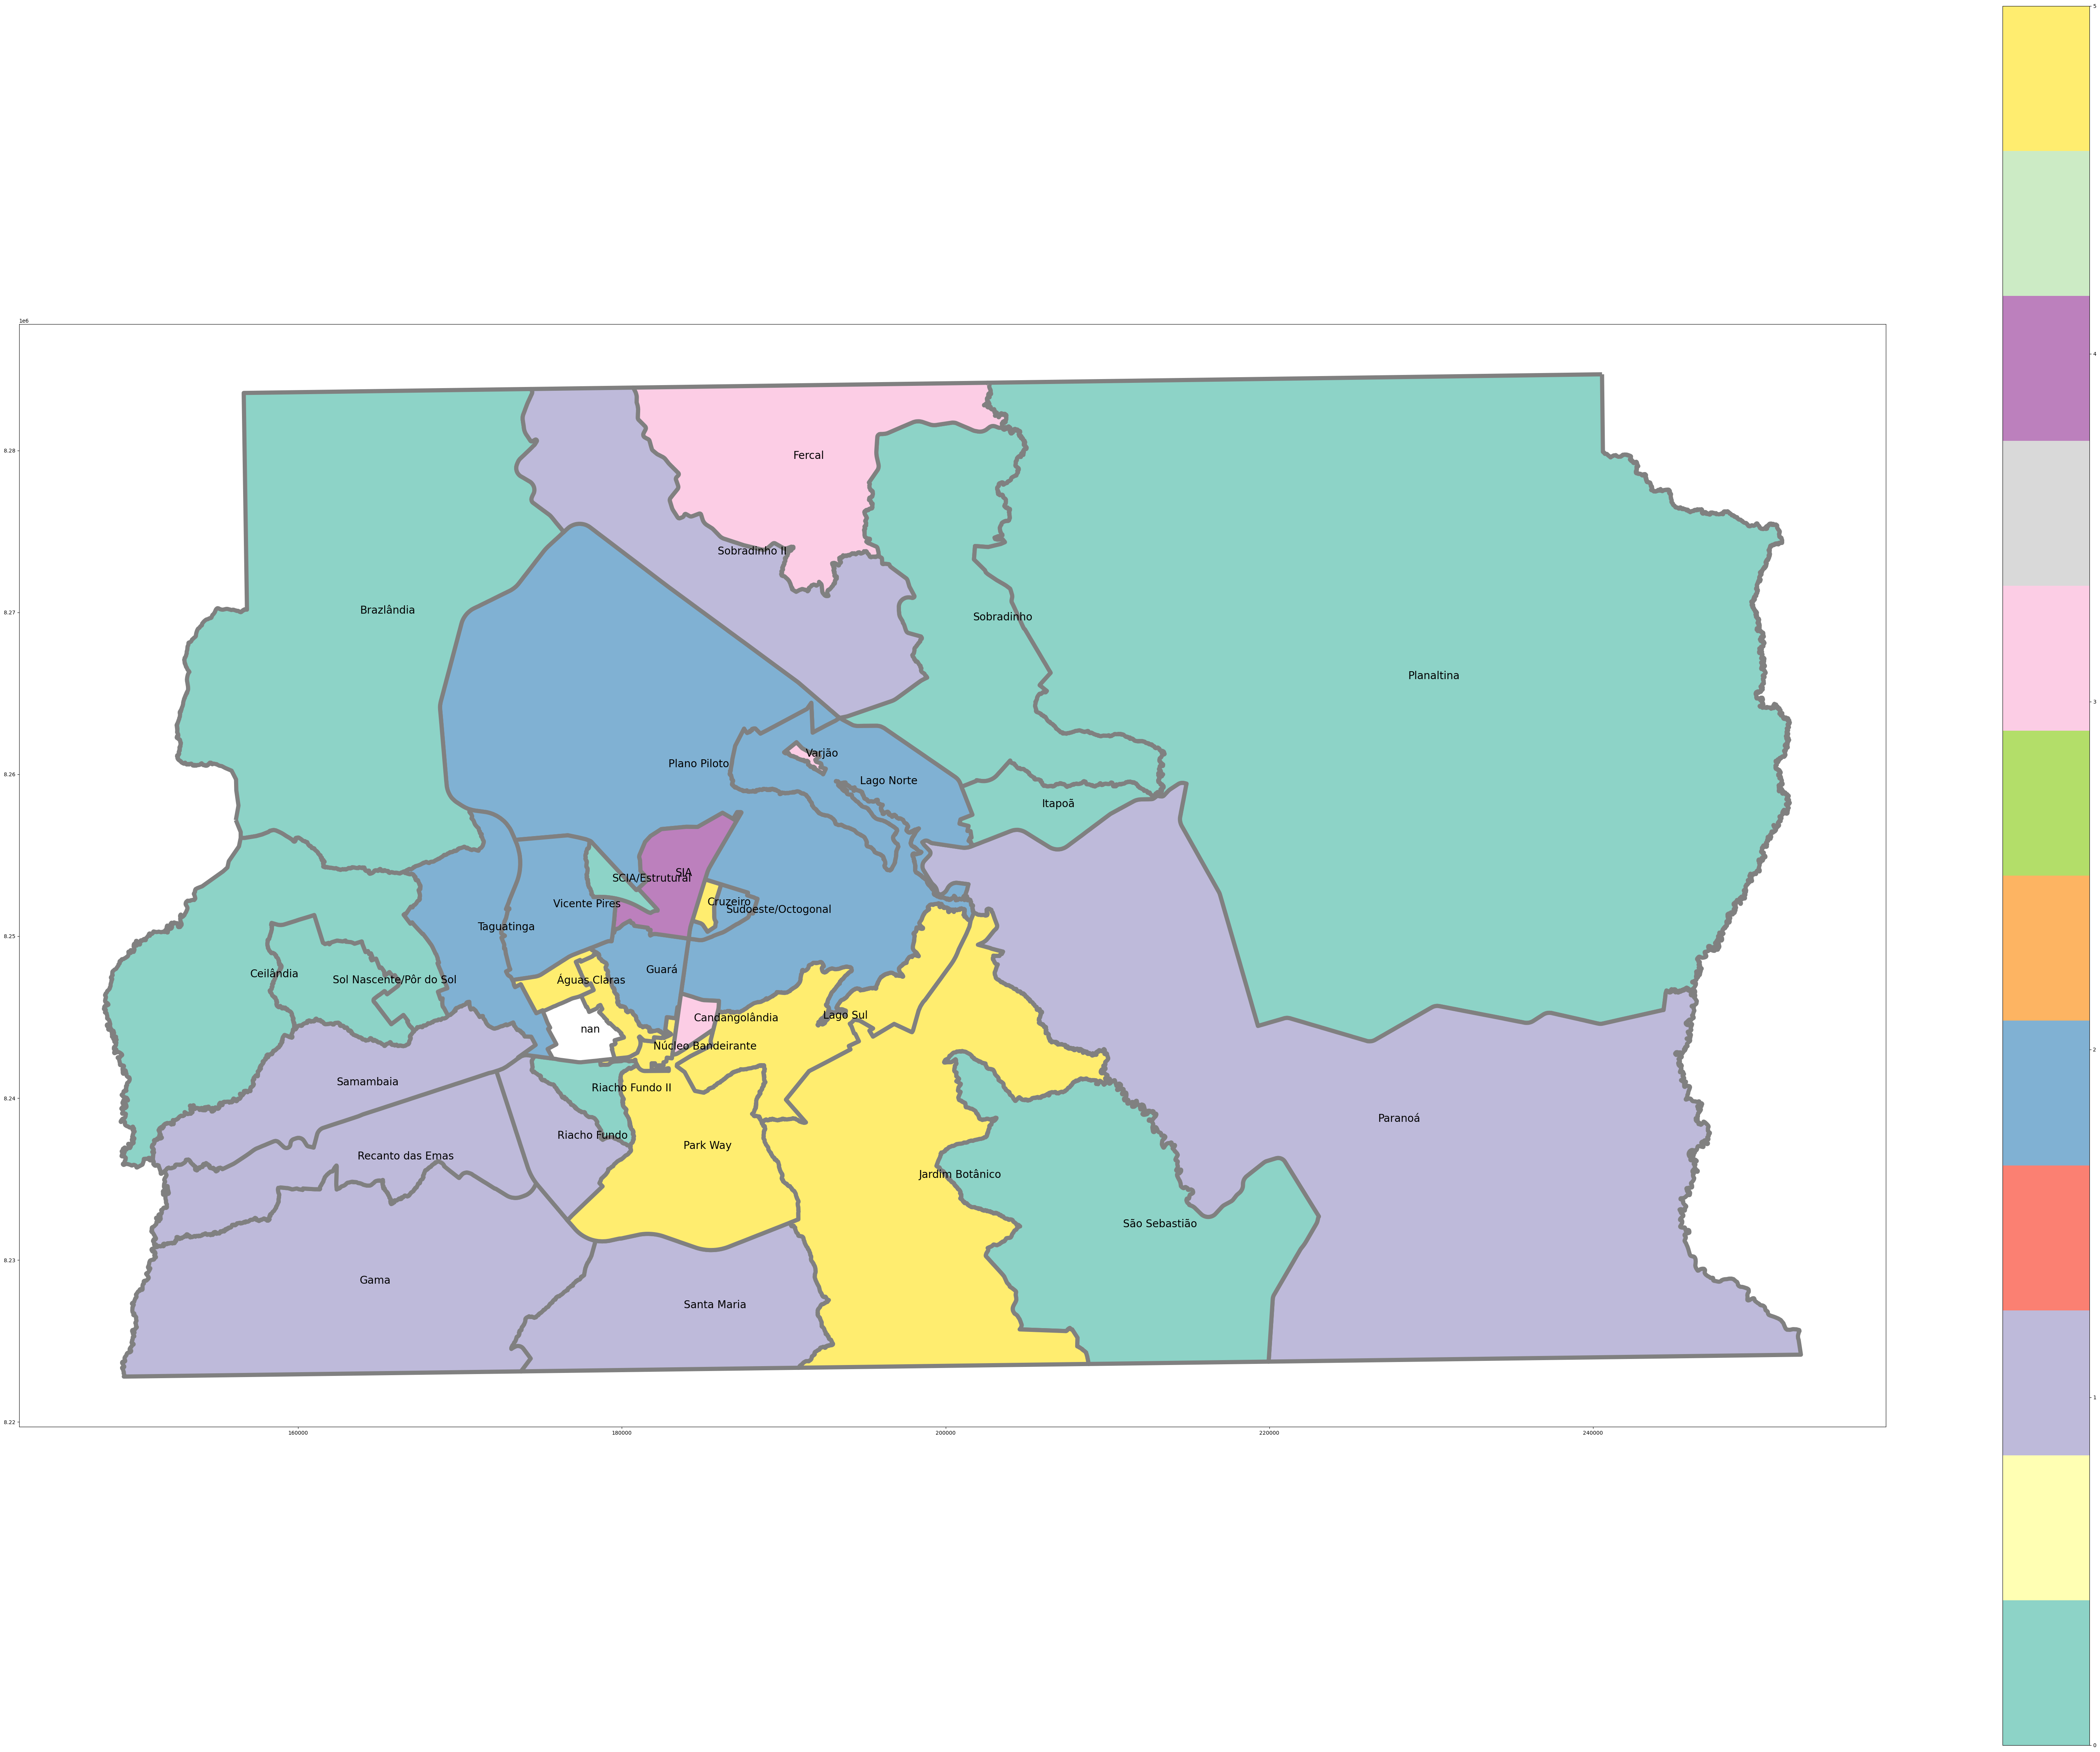

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Seus dados e plotagem
fig, ax = plt.subplots(1, figsize=(80, 60))
merged.plot(column='cluster', cmap='Set3', linewidth=8, ax=ax, edgecolor='0.5', legend=True)

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.Cidade):
    ax.text(x, y, label, fontsize=20)

plt.show()
